# Exploring Skill, Jobs, and Qualifications Demands in Market using PySpark

This project delves into a comprehensive analysis of skill demand trends within the job market using PySpark, renowned for its capability to efficiently handle large datasets. The primary objective here is to reveal underlying demands in job roles.

## Notebook Breakdown

- Importing Required Resources: Essential resources are imported to facilitate the analysis. As resource installation has been completed in the previous data processing notebook, we proceed directly to their importation.

- Data Loading and Visualization: The preprocessed data, stored as "processed_job_descriptions.csv" in the file directory, is loaded using PySpark. Employing PySpark DataFrame operations, an initial overview of the data is obtained to ensure data quality and completeness.

- Market Demand Analysis:

   1. **Most Demanding Skills:** Leveraging PySpark's robust capabilities, the most in-demand skills are extracted from the dataset. This analysis provides insights into the skills sought after by employers, shedding light on emerging trends and preferences in the job market.

   2. **Least Demanding Skills:** Conversely, the least demanded skills are identified to discern patterns of declining relevance or niche skill requirements in the market.

   3. **Most Demanding Qualifications:** The qualifications most frequently requested by employers are examined, highlighting educational backgrounds and credentials preferred in the current job landscape.

   4. **Most Demanding Jobs:** PySpark is utilized to identify the most sought-after jobs in the market. This analysis offers insights into the types of roles experiencing high demand in current market and provides context for talent acquisition strategies.

   5. **Least Demanding Jobs:** Similarly, the least demanded job titles are explored to understand roles with lower demand or declining relevance in the job market.

Through this PySpark-based analysis, the project aims to provide stakeholders with actionable insights, enabling informed decision-making and strategic planning for talent acquisition and skill development initiatives.

## Importing Required Libraies 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import findspark
from pyspark.sql.functions import col, when

findspark.init()

from pyspark.sql import SparkSession 
spark = SparkSession.builder.appName('Name').config('config_option', 'value').getOrCreate()

import warnings

warnings.filterwarnings("ignore")

24/04/06 23:12:08 WARN Utils: Your hostname, Pujas-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.97 instead (on interface en0)
24/04/06 23:12:08 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/06 23:12:09 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/04/06 23:12:09 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


### Data Loading and Visualization

In [2]:
df = spark.read.option('inferSchema', True).csv('processed_job_descriptions.csv', header=True)
df.limit(3).toPandas()

,Qualifications,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Job Title,...,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Min Salary,Max Salary,Min Exp,Max Exp
0,M.Tech,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Digital Marketing Specialist,...,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"""{""""Sector"""":""""Diversified""""",59000,99000,5,15
1,BCA,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Web Developer,...,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"""{""""Sector"""":""""Financial Services""""",56000,116000,2,12
2,PhD,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Operations Manager,...,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"""{""""Sector"""":""""Insurance""""",61000,104000,0,12


## Most Demanding Skills 

+--------------------+-----+
|    individual_skill|count|
+--------------------+-----+
|    Google Analytics|28199|
|              Python|27714|
|                 CSS|24281|
|              Sketch|24190|
|                 AWS|21021|
|                Java|20879|
|             Tableau|20876|
|Interaction desig...|20580|
|               CCNA)|17470|
|Network managemen...|17470|
+--------------------+-----+



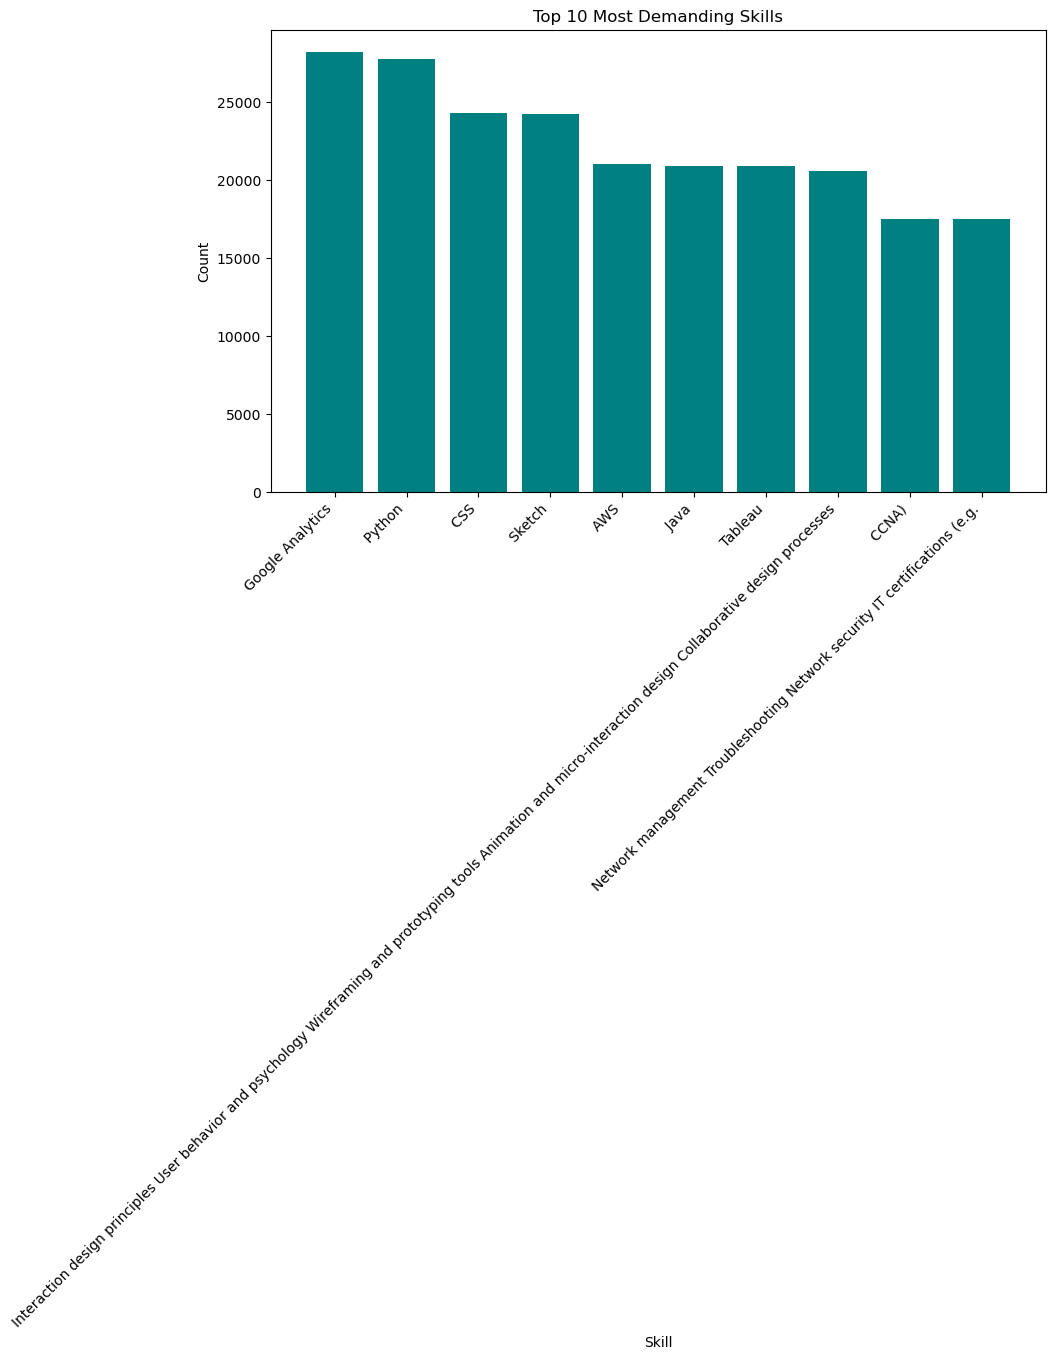

In [4]:
from pyspark.sql.functions import explode, split

df_with_individual_skills = df.withColumn("individual_skill", explode(split(df["skills"], ",")))

most_demanding_skills = df_with_individual_skills.groupBy("individual_skill").count().orderBy("count", ascending=False).limit(10)
most_demanding_skills.show()

# Convert the DataFrame to Pandas for plotting
most_demanding_skills_pd = most_demanding_skills.toPandas()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(most_demanding_skills_pd["individual_skill"], most_demanding_skills_pd["count"], color='teal')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.title('Top 10 Most Demanding Skills')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.savefig('top_10_jobs.png')
plt.show()

The analysis of the top ten most demanding skills unveils pivotal insights into the contemporary job market. It elucidates the growing emphasis on digital proficiency and data-driven competencies across various industries. Skills such as Google Analytics and Tableau underscore the burgeoning importance of data analytics and visualization for informed decision-making. The prevalence of Python and Java signifies the enduring relevance of programming expertise, while AWS reflects the pervasive shift towards cloud-based infrastructure and services. Additionally, the prominence of design-related skills like Sketch and Interaction Design highlights the critical role of user experience in product development. Moreover, certifications such as CCNA and competencies in network management underscore the enduring significance of robust IT infrastructure and networking capabilities. Overall, these insights underscore the dynamic nature of skill demands, reflecting the ongoing technological advancements shaping the modern workforce landscape.

## Least Demanding Skills

+--------------------+-----+
|    individual_skill|count|
+--------------------+-----+
|Google Ads manage...| 3306|
| NVivo) Report wr...| 3321|
|               Stata| 3321|
|Social science re...| 3321|
|Clinical nursing ...| 3324|
|Budget planning F...| 3335|
|Inventory managem...| 3342|
|Frontend and back...| 3346|
|Search engine mar...| 3350|
|Wedding design co...| 3353|
+--------------------+-----+



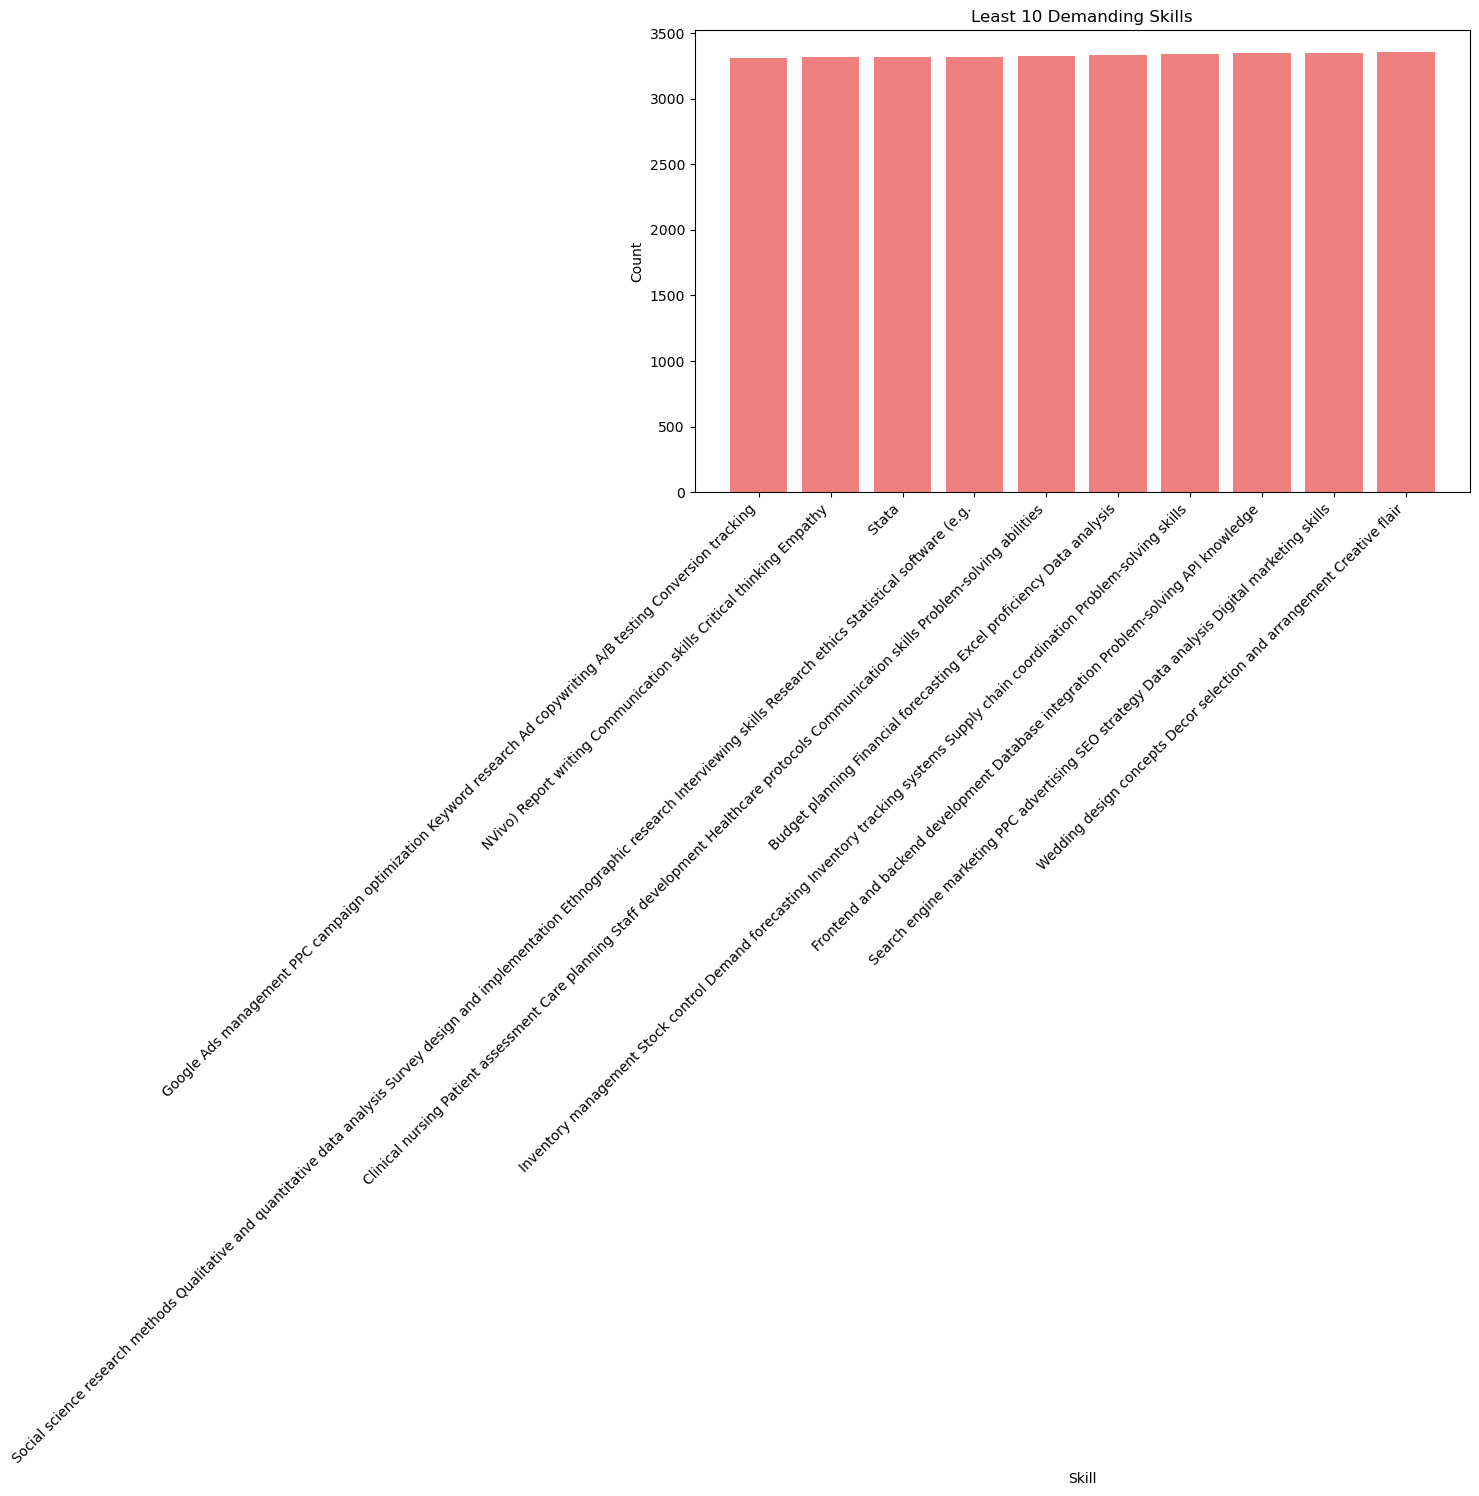

In [5]:
least_demanding_skills = df_with_individual_skills.groupBy("individual_skill").count().orderBy("count").limit(10)
least_demanding_skills.show()

# Convert the DataFrame to Pandas for plotting
least_demanding_skills_pd = least_demanding_skills.toPandas()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(least_demanding_skills_pd["individual_skill"], least_demanding_skills_pd["count"], color='lightcoral')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.title('Least 10 Demanding Skills')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

The analysis of the least ten demanding skills reveals noteworthy insights into specialized or niche areas within the job market. Despite their lower frequency in job postings, these skills still hold relevance in certain sectors. Skills like "Google Ads management" and "Search engine marketing" highlight specific expertise in digital marketing strategies and campaigns. Similarly, "Frontend and backend development" signifies the importance of full-stack development capabilities, albeit with fewer mentions compared to other technical skills. "Clinical nursing skills" and "Social science research" underscore specialized competencies in healthcare and academia, respectively. Moreover, skills such as "Stata" and "NVivo" point towards proficiency in statistical analysis and qualitative research methodologies, indicative of roles in research or academia. Additionally, "Wedding design coordination" reflects niche expertise in event planning and design, catering to specialized industries. The presence of "Budget planning" and "Inventory management" emphasizes the significance of financial and operational skills in organizational management. Overall, while these skills may not be as prevalent in job postings as others, they still showcase unique domains of expertise and potential career paths within specific industries or sectors.

## Most Demanding Qualifications

+--------------+------+
|Qualifications| count|
+--------------+------+
|           BBA|162148|
|            BA|162138|
|           BCA|161733|
|        M.Tech|161719|
|           PhD|161662|
|           MBA|161537|
|        B.Tech|161443|
|         M.Com|161396|
|         B.Com|161298|
|           MCA|160866|
+--------------+------+



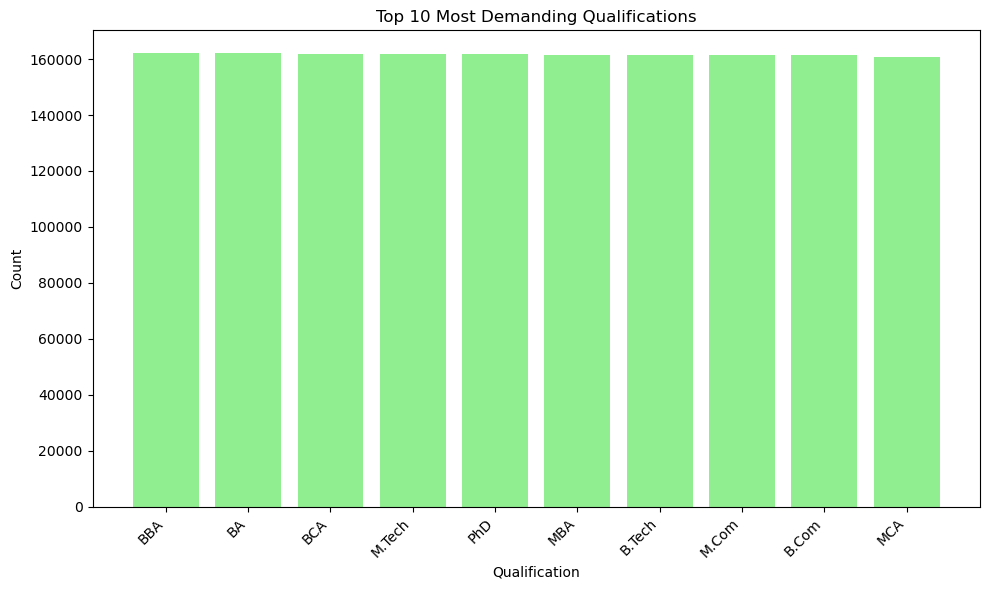

In [6]:
most_demanding_qualification = df.groupBy("Qualifications").count().orderBy("count", ascending=False).limit(10)
most_demanding_qualification.show()

# Convert the DataFrame to Pandas for plotting
most_demanding_qualification_pd = most_demanding_qualification.toPandas()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(most_demanding_qualification_pd["Qualifications"], most_demanding_qualification_pd["count"], color='lightgreen')
plt.xlabel('Qualification')
plt.ylabel('Count')
plt.title('Top 10 Most Demanding Qualifications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


The analysis of the most demanding qualifications unveils crucial insights into the educational requirements prevalent in the job market. Across various industries and job roles, qualifications such as BBA, BA, and BCA emerge as the most sought-after, with a considerable count of job postings requiring these degrees. These undergraduate qualifications signify a foundational understanding of business administration, arts, and computer applications, respectively, reflecting the diverse skill sets valued by employers. Additionally, advanced degrees like M.Tech and PhD demonstrate a growing demand for specialized technical expertise and advanced research skills in fields such as engineering and academia. The inclusion of MBA underscores the significance of business management acumen, while degrees like B.Tech and M.Com highlight specialized knowledge in technology and commerce domains. Moreover, qualifications such as B.Com and MCA indicate proficiency in financial and computing disciplines, essential for roles in accounting, finance, and software development. Overall, the prevalence of these qualifications underscores the importance of both foundational and specialized education in meeting the diverse demands of the contemporary job market.

## Most Demanding Jobs

+--------------------+-----+
|           Job Title|count|
+--------------------+-----+
|      UX/UI Designer|48551|
|Digital Marketing...|27975|
|   Software Engineer|27630|
|    Network Engineer|24393|
|     Software Tester|20945|
| Executive Assistant|20776|
| Procurement Manager|20734|
|   Financial Advisor|20687|
|Sales Representative|17664|
|Social Media Manager|17613|
+--------------------+-----+



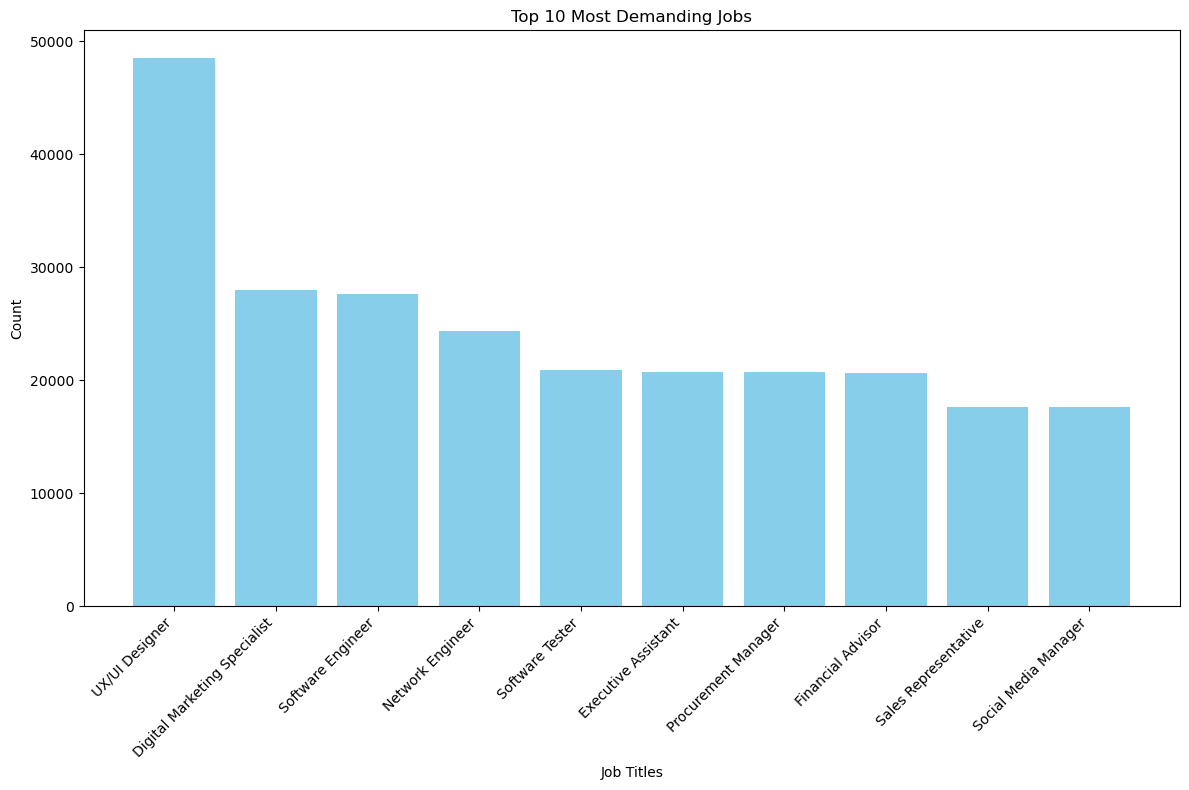

In [7]:
most_demanding_jobs = df.groupBy("Job Title").count().orderBy("count", ascending=False).limit(10)
most_demanding_jobs.show()

# Convert the DataFrame to Pandas for plotting
most_demanding_jobs_pd = most_demanding_jobs.toPandas()

# Plotting the bar plot
plt.figure(figsize=(12, 8))
plt.bar(most_demanding_jobs_pd["Job Title"], most_demanding_jobs_pd["count"], color='skyblue')
plt.xlabel('Job Titles')
plt.ylabel('Count')
plt.title('Top 10 Most Demanding Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.savefig('most_deamnding_jobs.png')
plt.show()

The analysis of the most demanding jobs sheds light on the prevalent job titles sought after in the contemporary job market. Occupations such as UX/UI Designer, Digital Marketing Specialist, and Software Engineer emerge as the top three most sought-after roles, reflecting the growing emphasis on digital proficiency and technical expertise. UX/UI Designers play a pivotal role in crafting intuitive and visually appealing digital experiences, while Digital Marketing Specialists drive online brand presence and customer engagement. Similarly, Software Engineers are in high demand due to their critical role in developing and maintaining software applications across industries.

Furthermore, technical roles such as Network Engineer and Software Tester underscore the importance of robust IT infrastructure and software quality assurance in today's digital landscape. Executive Assistants and Procurement Managers represent crucial support functions in organizational management, while Financial Advisors cater to the growing need for financial planning and advisory services. Additionally, Sales Representatives and Social Media Managers reflect the evolving dynamics of customer engagement and brand promotion in the digital age.

Overall, the prevalence of these job titles underscores the diverse skill sets and expertise valued by employers across industries, reflecting the ongoing digital transformation and specialization trends in the job market.







## Least Demanding Jobs 

+--------------------+-----+
|           Job Title|count|
+--------------------+-----+
|   Inventory Analyst| 3342|
| Key Account Manager| 3411|
|Procurement Coord...| 3424|
|         QA Engineer| 3439|
|  Personal Assistant| 3441|
|  Investment Advisor| 3452|
|    IT Administrator| 3476|
|     Sales Associate| 3482|
|     Network Analyst| 3482|
|       Event Manager| 3494|
+--------------------+-----+



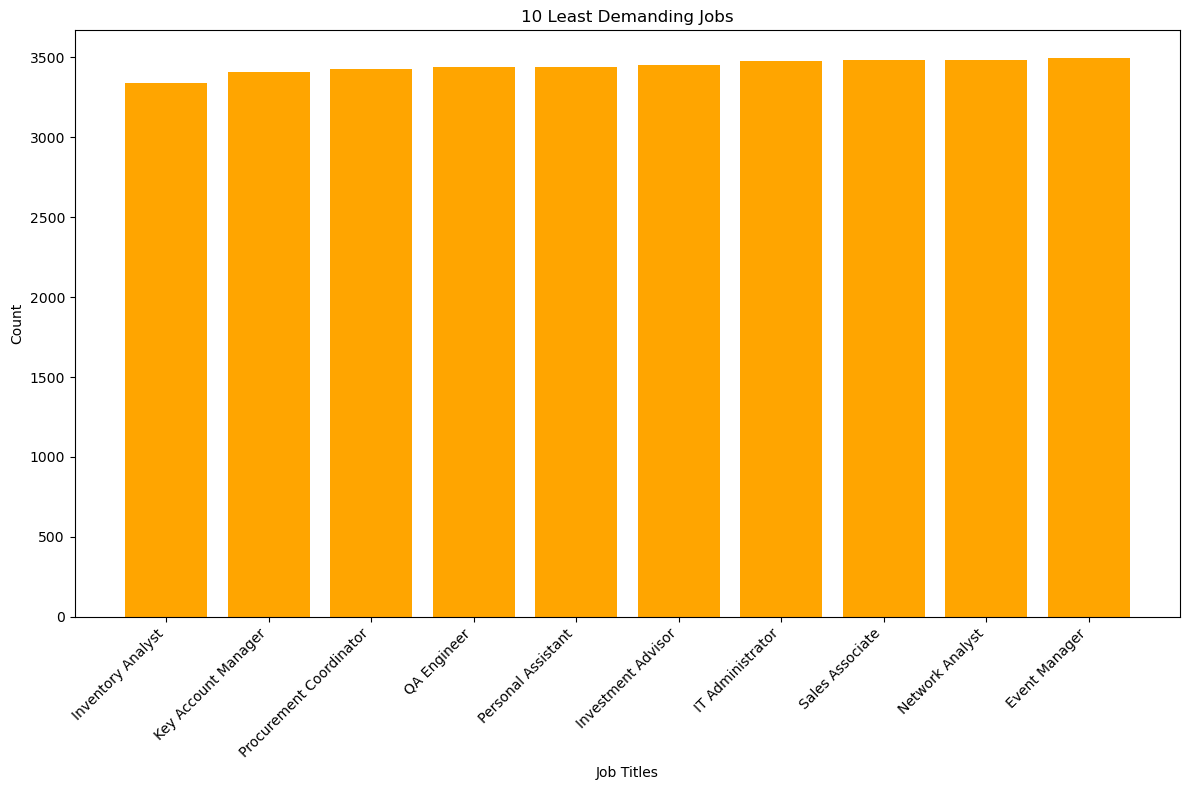

In [8]:
Least_demanding_jobs = df.groupBy("Job Title").count().orderBy("count", ascending=True).limit(10)
Least_demanding_jobs.show()

# Convert the DataFrame to Pandas for plotting
Least_demanding_jobs_pd = Least_demanding_jobs.toPandas()

# Plotting the bar plot
plt.figure(figsize=(12, 8))
plt.bar(Least_demanding_jobs_pd["Job Title"], Least_demanding_jobs_pd["count"], color='orange')
plt.xlabel('Job Titles')
plt.ylabel('Count')
plt.title('10 Least Demanding Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

The analysis of the least demanding jobs highlights roles that may have fewer mentions in job postings but still hold significance within specific industries or sectors. While these positions may not be as prevalent as others, they often cater to niche areas or specialized functions. Occupations such as Inventory Analyst, Key Account Manager, and Procurement Coordinator represent essential roles in supply chain management and client relationship management, albeit with fewer mentions compared to more common job titles.

Similarly, roles like QA Engineer and IT Administrator underscore the importance of quality assurance and IT infrastructure management, albeit with relatively lower demand in the job market. Personal Assistants and Investment Advisors cater to specific needs in administrative support and financial advisory services, while Sales Associates and Network Analysts fulfill essential functions in sales operations and network management, respectively.

Additionally, Event Managers represent a specialized role in event planning and management, reflecting a niche area within the hospitality, entertainment, or marketing industries. While these roles may not be as prevalent in job postings as others, they still play crucial roles in supporting organizational functions and meeting specific business needs within their respective domains.